In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = 'D:/accident.csv'
df = pd.read_csv(data)
df.head()

,Id,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,1,56,Female,27.0,No,No,1
1,2,69,Female,46.0,No,Yes,1
2,3,46,Male,46.0,Yes,Yes,0
3,4,32,Male,117.0,No,Yes,0
4,5,60,Female,40.0,Yes,Yes,0


In [14]:
df.tail()

,Id,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
195,196,69,Female,111.0,No,Yes,1
196,197,30,Female,51.0,No,Yes,1
197,198,58,Male,110.0,No,Yes,1
198,199,20,Male,103.0,No,Yes,1
199,200,56,Female,43.0,No,Yes,1


In [21]:
df = df.drop(columns='Id')
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [29]:
df.columns = df.columns.str.lower()
df.columns

Index(['age', 'gender', 'speed_of_impact', 'helmet_used', 'seatbelt_used',
       'survived'],
      dtype='object')

In [30]:
df.shape

(200, 6)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              200 non-null    int64  
 1   gender           199 non-null    object 
 2   speed_of_impact  197 non-null    float64
 3   helmet_used      200 non-null    object 
 4   seatbelt_used    200 non-null    object 
 5   survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [32]:
df.describe()

,age,speed_of_impact,survived
count,200.00000,197.000000,200.00000
mean,43.42500,70.441624,0.50500
std,14.94191,30.125298,0.50123
min,18.00000,20.000000,0.00000
25%,31.00000,43.000000,0.00000
50%,43.50000,71.000000,1.00000
75%,56.00000,95.000000,1.00000
max,69.00000,119.000000,1.00000


In [33]:
df.describe(include='O')

,gender,helmet_used,seatbelt_used
count,199,200,200
unique,2,2,2
top,Female,Yes,Yes
freq,110,111,111


In [ ]:
df.duplicated().sum()
#df = df.drop_duplicates()

np.int64(0)

In [35]:
df.isnull().sum()

age                0
gender             1
speed_of_impact    3
helmet_used        0
seatbelt_used      0
survived           0
dtype: int64

In [39]:
df['gender'].mode()

0    Female
Name: gender, dtype: object

In [40]:
#df = df.dropna(subset=['gender','speed_of_impact'],inplace=True,axis=0)
df['gender'].fillna(df['gender'].mode()[0], inplace = True)
df['speed_of_impact'].fillna(df['speed_of_impact'].mean() , inplace = True)
df.isnull().sum()

C:\Users\maria\AppData\Local\Temp\ipykernel_11224\3756376425.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['speed_of_impact'].fillna(df['speed_of_impact'].mean() , inplace = True)


age                0
gender             0
speed_of_impact    0
helmet_used        0
seatbelt_used      0
survived           0
dtype: int64

In [41]:
df.head()

,age,gender,speed_of_impact,helmet_used,seatbelt_used,survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [49]:
survival_counts  = df['survived'].value_counts()
survival_counts

survived
1    101
0     99
Name: count, dtype: int64

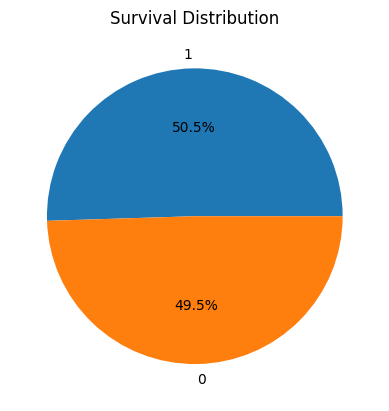

In [52]:
plt.pie(survival_counts, labels=survival_counts.index,autopct='%1.1f%%')
plt.title("Survival Distribution")
plt.show()

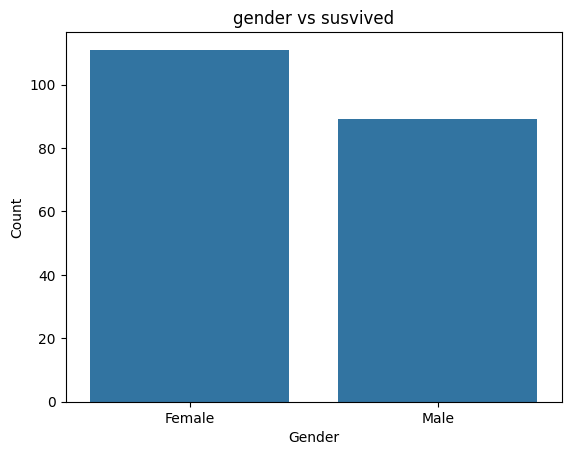

In [90]:
sns.countplot(x = 'gender' , data = df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("gender vs susvived")
plt.show()

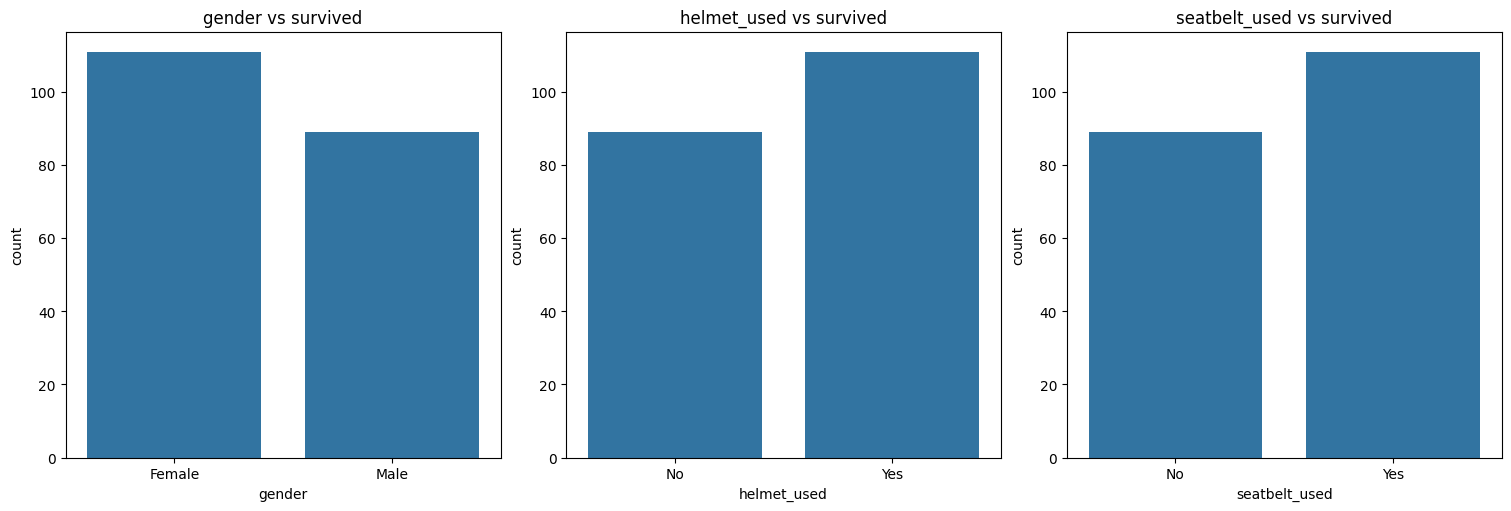

In [88]:
#cat_features = df[['gender','helmet_used','seatbelt_used']]

cat_features = df.columns[df.dtypes == 'object']
num_features = len(cat_features)

fig , axes = plt.subplots(1,num_features,constrained_layout=True, figsize=(15, 5))
for i , c in enumerate(cat_features):
    sns.countplot(x = c , data = df,ax=axes[i])
    axes[i].set_title('{} vs survived'.format(c))
plt.show()

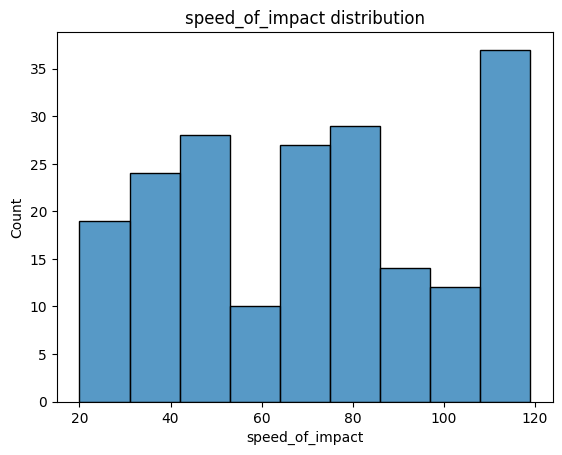

In [89]:
sns.histplot(df['speed_of_impact'])
plt.title("speed_of_impact distribution")
plt.show()

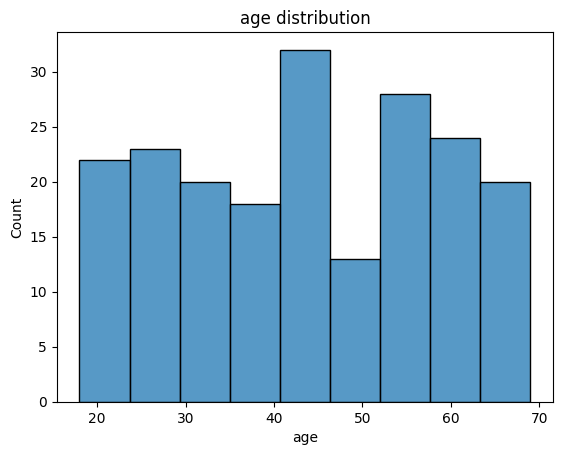

In [91]:
sns.histplot(df['age'])
plt.title("age distribution")
plt.show()

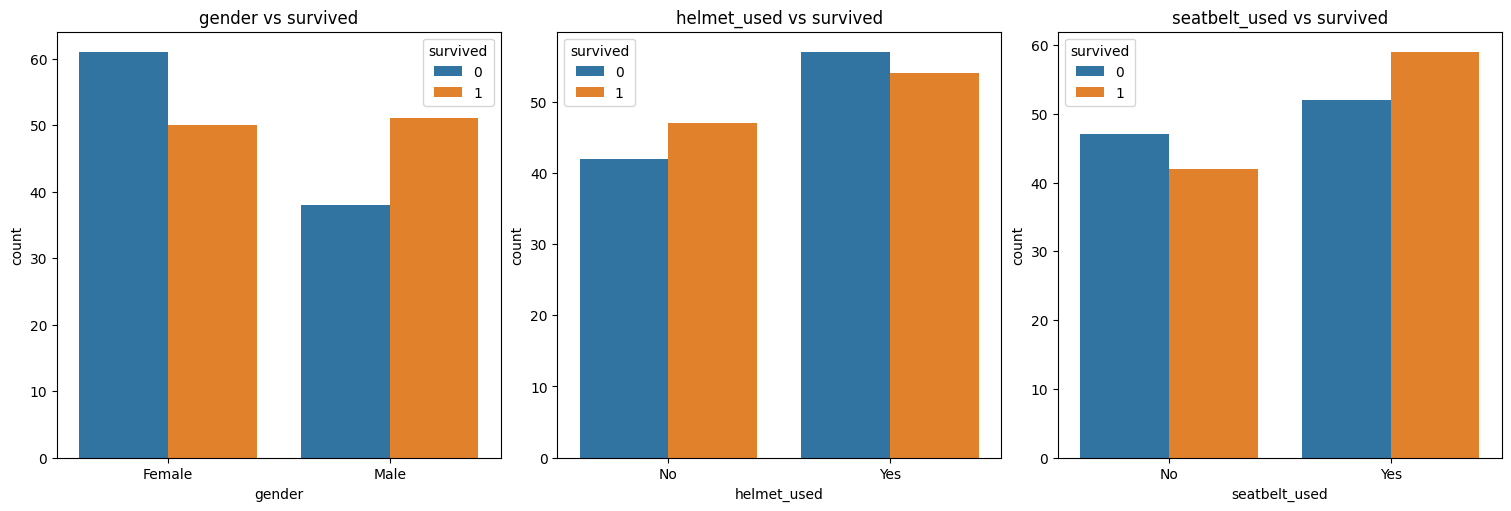

In [ ]:
fig , axes = plt.subplots(1,num_features,constrained_layout=True, figsize=(15, 5))
for i , c in enumerate(cat_features):
    sns.countplot(x = c , hue= 'survived' , data = df,ax=axes[i])
    axes[i].set_title('{} vs survived'.format(c))
plt.show()

C:\Users\maria\AppData\Local\Temp\ipykernel_11224\1765056077.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Survived', 'Not Survived'], y=[survived, not_survived], palette=['green', 'red'])


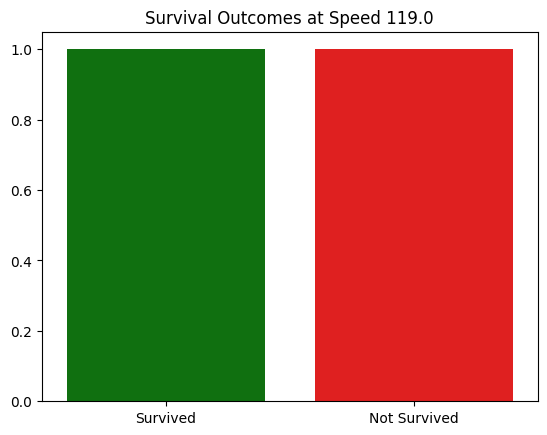

In [94]:
max_speed = df['speed_of_impact'].max()
high_speed_cases = df[df['speed_of_impact'] == max_speed]
survived = (high_speed_cases['survived'] == 1).sum()
not_survived = (high_speed_cases['survived'] == 0).sum()

sns.barplot(x=['Survived', 'Not Survived'], y=[survived, not_survived], palette=['green', 'red'])
plt.title(f'Survival Outcomes at Speed {max_speed}')
plt.show()

In [99]:
def categorize_speed(speed):
    if speed < 40:
        return 'low'
    elif speed < 80:
        return 'medium'
    else:
        return 'high'
    
df['speed_category'] = df['speed_of_impact'].apply(categorize_speed)
survival_rates = df.groupby('speed_category')['survived'].mean()
print(survival_rates)
threshold_speed = survival_rates[survival_rates.diff() < -0.05].index[0] if any(survival_rates.diff() < -0.05) else "No significant drop"

speed_category
high      0.531646
low       0.450000
medium    0.506173
Name: survived, dtype: float64


C:\Users\maria\AppData\Local\Temp\ipykernel_11224\936424219.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rates.index, y=survival_rates, palette="coolwarm")


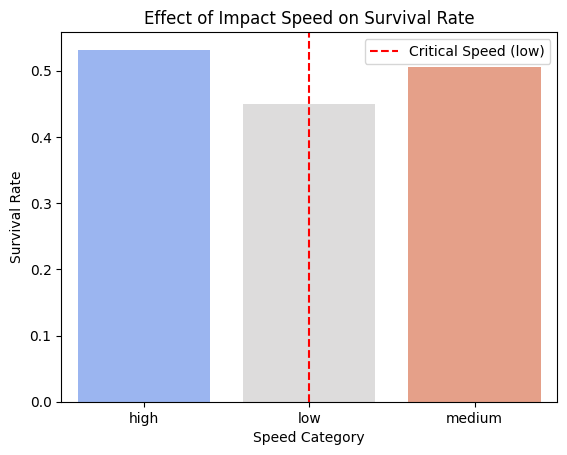

In [101]:
sns.barplot(x=survival_rates.index, y=survival_rates, palette="coolwarm")
if threshold_speed != "No significant drop":
    plt.axvline(survival_rates.index.tolist().index(threshold_speed), color='red', linestyle='--', label=f"Critical Speed ({threshold_speed})")

plt.xlabel("Speed Category")
plt.ylabel("Survival Rate")
plt.title("Effect of Impact Speed on Survival Rate")
plt.legend()
plt.show()

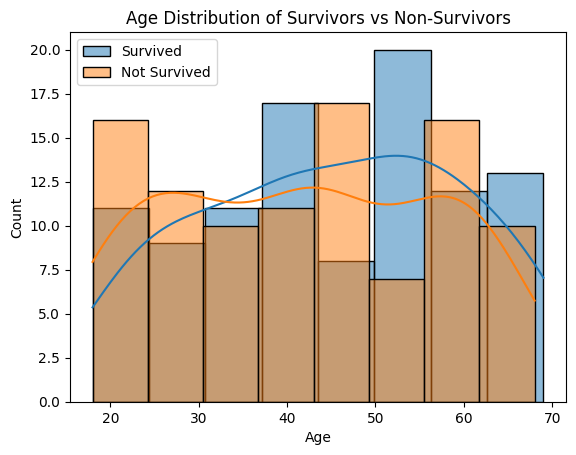

In [85]:
sns.histplot(df[df['survived'] == 1]['age'], label="Survived", kde=True)
sns.histplot(df[df['survived'] == 0]['age'], label="Not Survived", kde=True)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Survivors vs Non-Survivors")
plt.show()

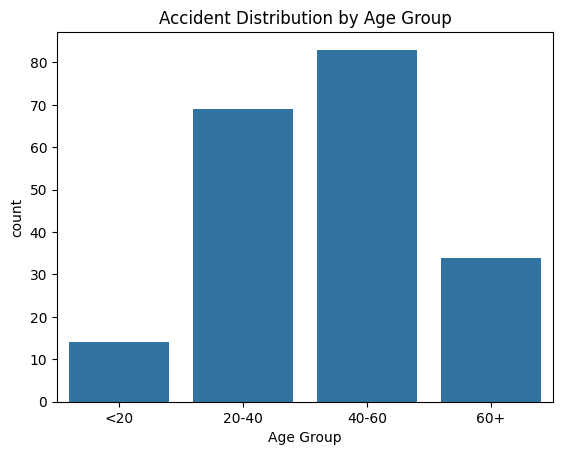

In [92]:
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80], labels=['<20', '20-40', '40-60', '60+'])
sns.countplot(x='age_group', data=df)
plt.xlabel("Age Group")
plt.ylabel("count")
plt.title("Accident Distribution by Age Group")
plt.show()

C:\Users\maria\AppData\Local\Temp\ipykernel_11224\1898649183.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates_age = df.groupby('age_group')['survived'].mean()


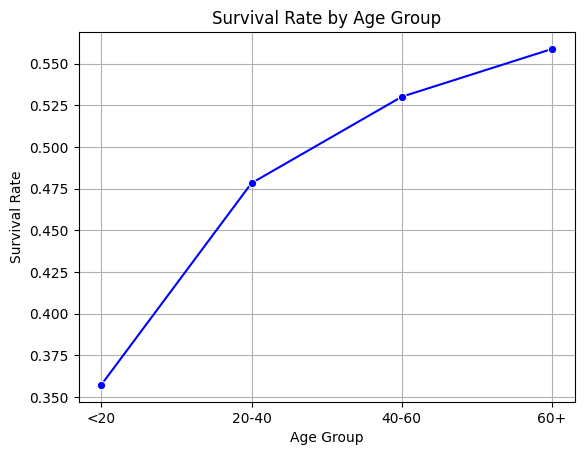

In [105]:
survival_rates_age = df.groupby('age_group')['survived'].mean()

sns.lineplot(x=survival_rates_age.index, y=survival_rates_age.values, marker='o', color='blue')
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Age Group")
plt.grid(True)
plt.show()

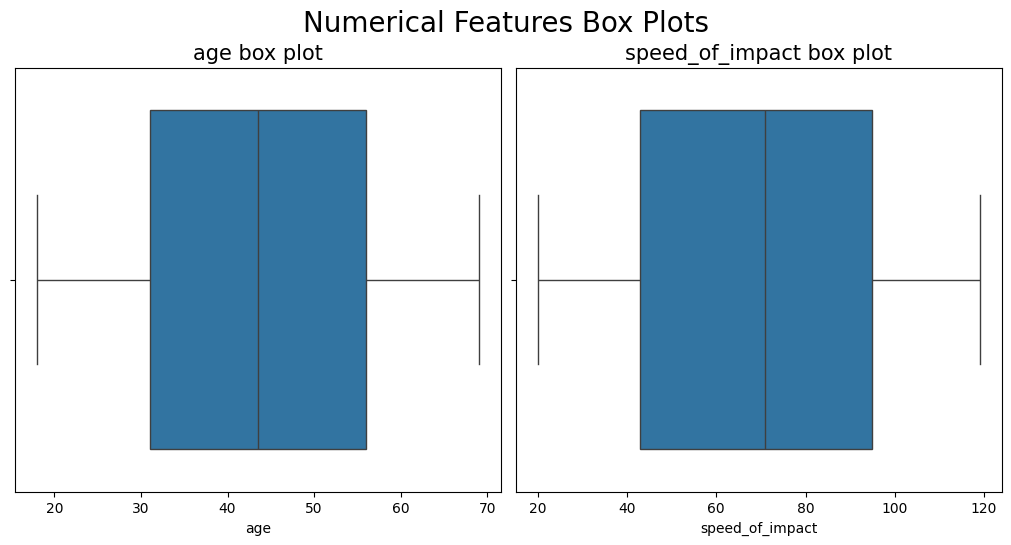

In [113]:
numerical_features = df[['age','speed_of_impact']]
fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
axs = axs.flatten()
for i, c in enumerate(numerical_features.columns):
    sns.boxplot(data=df, x=c, ax=axs[i])
    axs[i].set_title('{} box plot'.format(c), fontsize=15)

plt.suptitle('Numerical Features Box Plots', x=0.5, y=1.06, fontsize=20)
plt.show()

In [ ]:
def outliers_handling(x, p1=0.25 , p2=0.75):
    ql = x.quantile(p1)
    q3 = x.quantile(p2)
    iqr = q3 - ql
    min_limit = ql - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    return x[(x > min_limit) & (x < max_limit)]

for col in numerical_features:
    df[col] = outliers_handling(df[col])

In [114]:
corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix["survived"].sort_values(ascending = False)

survived           1.000000
age                0.110090
speed_of_impact    0.042198
Name: survived, dtype: float64

<Axes: >

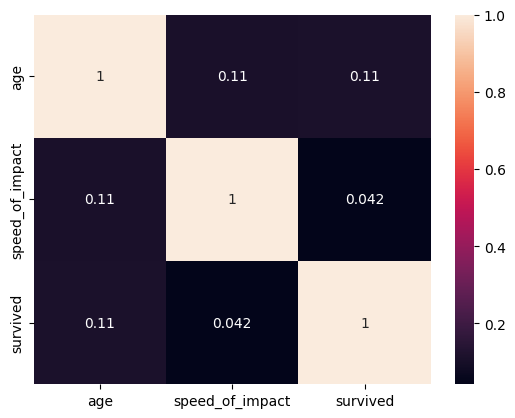

In [112]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)